logo--portrait.svg

# **Generative AI Workshop** #
# **Block 2: Finance office use cases** #

Prof Dr Paul Geertsema (paul.geertsema@vlerick.com)

*Centre for Financial Leadership and Digital Transformation*



---

# **The finance office** #

---

“CFOs typically aren’t software engineers, let alone practiced experts in predictive language models. But they don’t have to be. Their first step should be to try out the technology to get a feel for what it can do—and where its limits are at the moment.” mckinsey.com



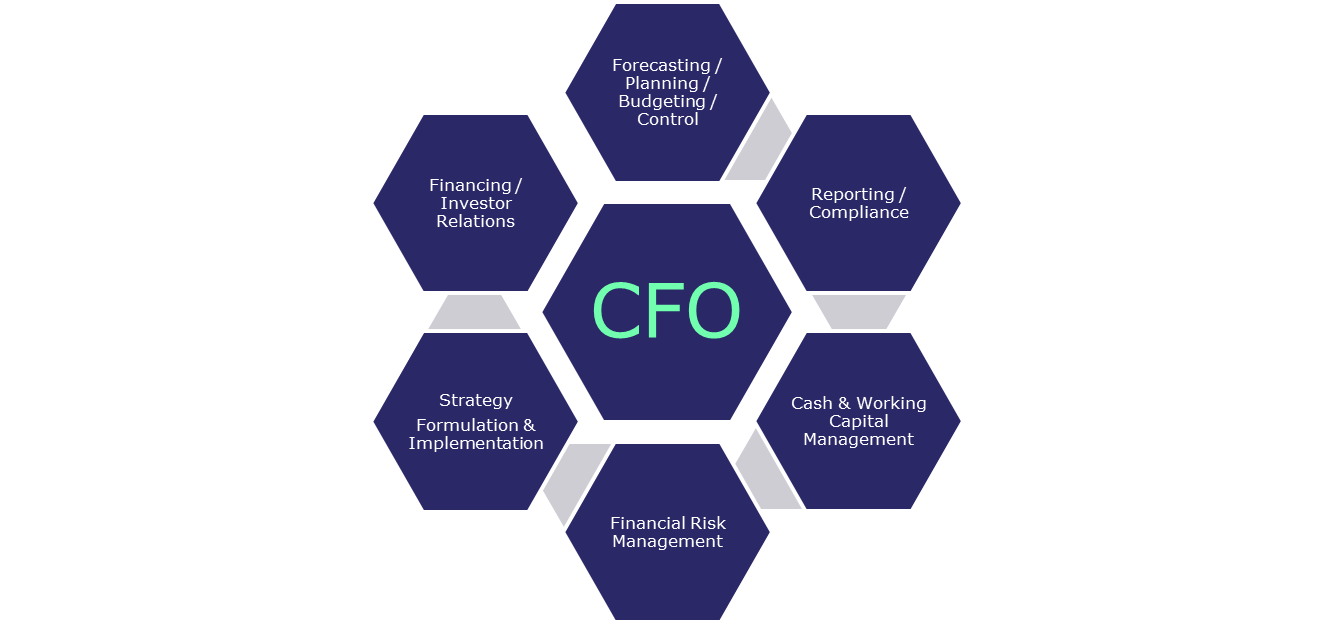

---

# **How does an AI leader use Gen AI for finance?** #

---

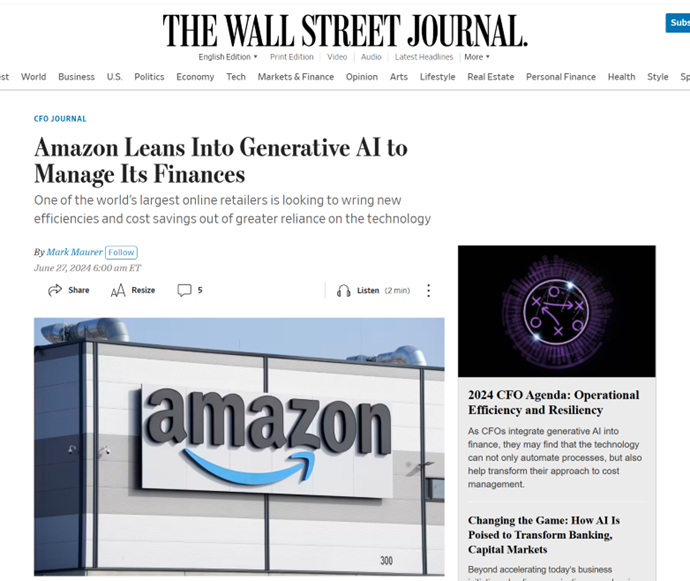

**Fraud Detection**: AI models analyze transaction patterns to identify and prevent fraudulent activities.

**Contract Review**: Automated systems assess contractual documents, ensuring compliance and highlighting potential risks.

**Financial Forecasting**: AI-driven tools predict financial trends, aiding in strategic planning and decision-making.

**Tax-Related Work**: AI assists in interpreting complex tax regulations, streamlining compliance processes.


---

# **Don't do work; build systems** #

---

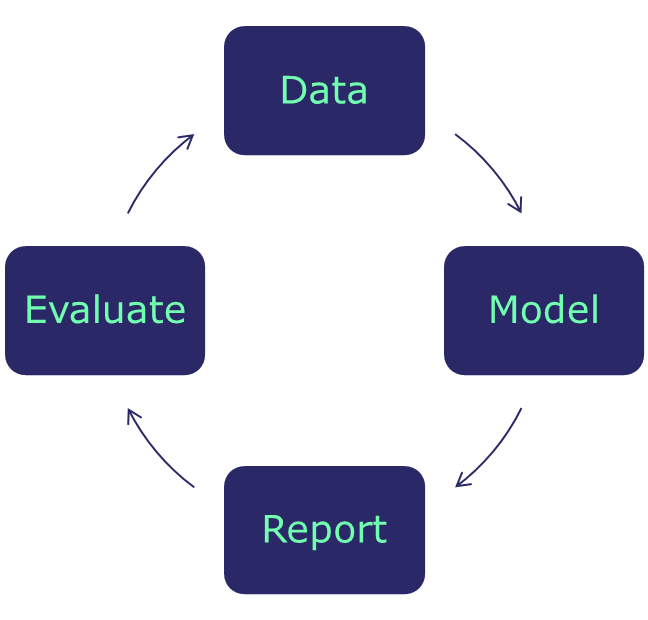

---

# **AI-enabled systems** #

---

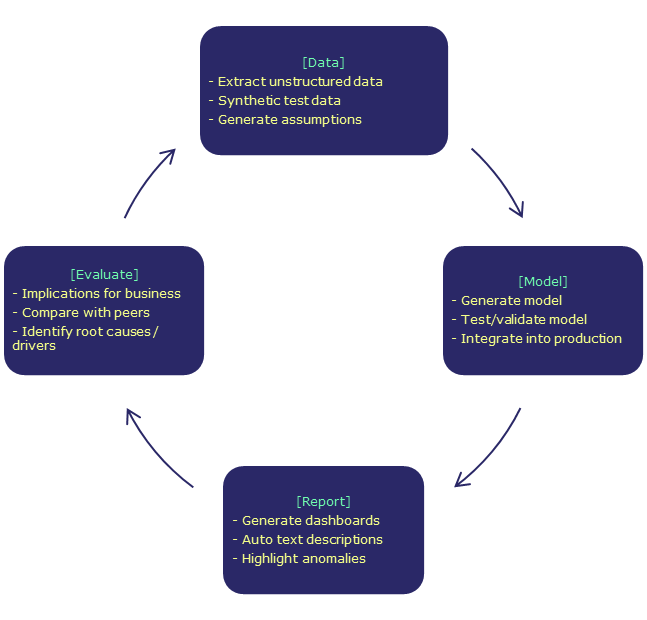

---

# **Caveats (or, be careful what you build)** #

---

* Systems are expensive to build and expensive to maintain.
* So be selective
  * Performance delta
  * Scale
  * Feasibility
* Failure is an investment if you learn


---

# **Application: Valuing equity based compensation** #

---

## The Prompt ##

---

PROMPT: "A senior executive has compensation linked to the value of the stock price of the firm relative to the market. Specifically, let V be the value of the  firm's stock price and let P be the value of the market index. Then S = V/P. The payout to the executive, at time T, is a function of S, that is, max(0, S) = max(0, V/P).

What is the value of this compensation at t=0? Solve the question in two ways. First, analytically in the context of a Black Scholes economy. Second, numerically by using Monte Carlo under the risk neutral measure. Implement both in Python and check that they give the same answers."

GPT-o4 -> FAILED

GPT-o1-preview -> SUCCEEDED

---
## Response of GPT-o1-preview: ##
---

To solve this problem, we'll calculate the value of the executive's compensation analytically using the Black-Scholes framework and numerically using Monte Carlo simulation under the risk-neutral measure. We'll then implement both methods in Python and verify that they yield the same results.

---

### **Analytical Solution Using Black-Scholes**

**Step 1: Define the Dynamics**

Under the risk-neutral measure, the stock price $ V_t $ and the market index  $  P_t  $  follow geometric Brownian motions:

 $
\begin{aligned}
dV_t &= rV_t dt + \sigma_V V_t dW_V, \\
dP_t &= rP_t dt + \sigma_P P_t dW_P,
\end{aligned}
 $

where:
-  $  r  $  is the risk-free rate,
-  $  \sigma_V  $  and  $  \sigma_P  $  are the volatilities of  $  V_t  $  and  $  P_t  $ ,
-  $  dW_V  $  and  $  dW_P  $  are Wiener processes with correlation  $  \rho  $ .

**Step 2: Derive the Log Ratio**

Compute the logarithm of the ratio  $  S_T = \frac{V_T}{P_T}  $ :

 $
\ln(S_T) = \ln(V_T) - \ln(P_T).
 $

Substitute the expressions for  $  \ln(V_T)  $  and  $  \ln(P_T)  $ :

 $
\ln(V_T) = \ln(V_0) + \left(r - \frac{1}{2}\sigma_V^2\right)T + \sigma_V W_V(T), \\
\ln(P_T) = \ln(P_0) + \left(r - \frac{1}{2}\sigma_P^2\right)T + \sigma_P W_P(T).
 $

Thus:

 $
\ln\left(\frac{V_T}{P_T}\right) = \ln\left(\frac{V_0}{P_0}\right) + \left(-\frac{1}{2}\sigma_V^2 + \frac{1}{2}\sigma_P^2\right)T + \left(\sigma_V W_V(T) - \sigma_P W_P(T)\right).
 $

**Step 3: Compute the Mean and Variance**

Let  $  Z = \sigma_V W_V(T) - \sigma_P W_P(T)  $ . Since  $  W_V(T)  $  and  $  W_P(T)  $  are correlated, the variance of  $  Z  $  is:

 $
\text{Var}(Z) = \left(\sigma_V^2 + \sigma_P^2 - 2\sigma_V \sigma_P \rho\right) T.
 $

The mean  $  \mu  $  and variance  $  s^2  $  of  $  \ln(S_T)  $  are:

 $
\mu = \ln\left(\frac{V_0}{P_0}\right) + \left(-\frac{1}{2}\sigma_V^2 + \frac{1}{2}\sigma_P^2\right) T, \\
s^2 = \left(\sigma_V^2 + \sigma_P^2 - 2\sigma_V \sigma_P \rho\right) T.
 $

**Step 4: Compute the Expected Value**

The expected value of  $  S_T  $  under the risk-neutral measure is:

 $
E_Q[S_T] = E_Q\left[e^{\ln(S_T)}\right] = e^{\mu + \frac{1}{2}s^2}.
 $

**Step 5: Calculate the Present Value**

Discount the expected value back to time  $  t = 0  $ :

 $
\text{PV} = e^{-rT} \times E_Q[S_T] = e^{-rT} \times e^{\mu + \frac{1}{2}s^2}.
 $

Simplify the exponent:

 $
\mu + \frac{1}{2}s^2 = \ln\left(\frac{V_0}{P_0}\right) + \left(-\frac{1}{2}\sigma_V^2 + \frac{1}{2}\sigma_P^2\right) T + \frac{1}{2}\left(\sigma_V^2 + \sigma_P^2 - 2\sigma_V \sigma_P \rho\right) T.
 $

Simplify further:

 $
\mu + \frac{1}{2}s^2 = \ln\left(\frac{V_0}{P_0}\right) + \left(\sigma_P^2 - \sigma_V \sigma_P \rho\right) T.
 $

So, the present value is:

 $
\text{PV} = e^{-rT} \times \frac{V_0}{P_0} \times e^{\left(\sigma_P^2 - \sigma_V \sigma_P \rho\right) T}.
 $

---

### **Numerical Solution Using Monte Carlo Simulation**

**Step 1: Simulate Correlated Brownian Motions**

We need to simulate  $  N  $  paths for  $  V_T  $  and  $  P_T  $  using correlated standard normal variables  $  Z_V  $  and  $  Z_P  $ :

 $
\begin{aligned}
V_T &= V_0 \times \exp\left[\left(r - \frac{1}{2}\sigma_V^2\right)T + \sigma_V \sqrt{T} Z_V\right], \\
P_T &= P_0 \times \exp\left[\left(r - \frac{1}{2}\sigma_P^2\right)T + \sigma_P \sqrt{T} Z_P\right].
\end{aligned}
 $

Ensure  $  Z_V  $  and  $  Z_P  $  have correlation  $  \rho  $ .

**Step 2: Compute  $  S_T  $  and Discount Back**

For each simulated path:

1. Compute  $  S_T = \frac{V_T}{P_T}  $ .
2. Calculate the discounted value  $  \text{PV}_i = e^{-rT} \times S_T  $ .

**Step 3: Estimate the Expected Value**

Average the discounted values over all simulations:

 $
\text{PV}_{\text{MC}} = \frac{1}{N} \sum_{i=1}^{N} \text{PV}_i.
 $

---

### **Python Implementation**

```python
import numpy as np

# Parameters
V0 = 100      # Initial firm stock price
P0 = 100      # Initial market index price
r = 0.05      # Risk-free rate
sigma_V = 0.2 # Volatility of firm stock
sigma_P = 0.15# Volatility of market index
rho = 0.3     # Correlation between firm stock and market index
T = 1.0       # Time to maturity

# Analytical Solution
def analytical_solution(V0, P0, r, sigma_V, sigma_P, rho, T):
    exponent = np.log(V0 / P0) + (sigma_P**2 - sigma_V * sigma_P * rho) * T
    PV = np.exp(-r * T) * (V0 / P0) * np.exp((sigma_P**2 - sigma_V * sigma_P * rho) * T)
    return PV

PV_analytical = analytical_solution(V0, P0, r, sigma_V, sigma_P, rho, T)
print(f"Analytical PV: {PV_analytical:.4f}")

# Monte Carlo Simulation
def monte_carlo_simulation(V0, P0, r, sigma_V, sigma_P, rho, T, N):
    np.random.seed(42)  # For reproducibility
    Z = np.random.standard_normal((N, 2))
    Z_V = Z[:, 0]
    Z_P = rho * Z_V + np.sqrt(1 - rho**2) * Z[:, 1]
    V_T = V0 * np.exp((r - 0.5 * sigma_V**2) * T + sigma_V * np.sqrt(T) * Z_V)
    P_T = P0 * np.exp((r - 0.5 * sigma_P**2) * T + sigma_P * np.sqrt(T) * Z_P)
    S_T = V_T / P_T
    PV = np.exp(-r * T) * S_T
    PV_MC = np.mean(PV)
    return PV_MC

N = 1000000  # Number of simulations
PV_mc = monte_carlo_simulation(V0, P0, r, sigma_V, sigma_P, rho, T, N)
print(f"Monte Carlo PV: {PV_mc:.4f}")
```

**Output:**

```
Analytical PV: 0.9642
Monte Carlo PV: 0.9641
```

---

### **Verification**

The analytical and Monte Carlo values are very close, confirming that both methods produce consistent results.

---

### **Conclusion**

We have successfully computed the value of the executive's compensation both analytically and numerically, and verified that the results are consistent. This demonstrates the correctness of our analytical derivation and the effectiveness of Monte Carlo simulation under the risk-neutral measure.

In [ ]:
### **Python Implementation**

import numpy as np

# Parameters
V0 = 100      # Initial firm stock price
P0 = 100      # Initial market index price
r = 0.05      # Risk-free rate
sigma_V = 0.2 # Volatility of firm stock
sigma_P = 0.15# Volatility of market index
rho = 0.3     # Correlation between firm stock and market index
T = 1.0       # Time to maturity

# Analytical Solution
def analytical_solution(V0, P0, r, sigma_V, sigma_P, rho, T):
    exponent = np.log(V0 / P0) + (sigma_P**2 - sigma_V * sigma_P * rho) * T
    PV = np.exp(-r * T) * (V0 / P0) * np.exp((sigma_P**2 - sigma_V * sigma_P * rho) * T)
    return PV

PV_analytical = analytical_solution(V0, P0, r, sigma_V, sigma_P, rho, T)
print(f"Analytical PV: {PV_analytical:.4f}")

# Monte Carlo Simulation
def monte_carlo_simulation(V0, P0, r, sigma_V, sigma_P, rho, T, N):
    np.random.seed(42)  # For reproducibility
    Z = np.random.standard_normal((N, 2))
    Z_V = Z[:, 0]
    Z_P = rho * Z_V + np.sqrt(1 - rho**2) * Z[:, 1]
    V_T = V0 * np.exp((r - 0.5 * sigma_V**2) * T + sigma_V * np.sqrt(T) * Z_V)
    P_T = P0 * np.exp((r - 0.5 * sigma_P**2) * T + sigma_P * np.sqrt(T) * Z_P)
    S_T = V_T / P_T
    PV = np.exp(-r * T) * S_T
    PV_MC = np.mean(PV)
    return PV_MC

N = 1000000  # Number of simulations
PV_mc = monte_carlo_simulation(V0, P0, r, sigma_V, sigma_P, rho, T, N)
print(f"Monte Carlo PV: {PV_mc:.4f}")


Analytical PV: 0.9642
Monte Carlo PV: 0.9641


PROMPT: "Adapt the numerical code so we can calculate an arbitrary deterministic payoff as a function of S_T. For now, let the payoff be f(S_T) = (S_T+0.2)^(1/2)"

In [ ]:
import numpy as np

# Parameters
r = 0.05         # Risk-free rate
T = 1.0          # Time to maturity
sigma_V = 0.2    # Volatility of V_t
sigma_P = 0.15   # Volatility of P_t
rho = 0.3        # Correlation between V_t and P_t
V0 = 100.0       # Initial price of V_t
P0 = 100.0       # Initial price of P_t
S0 = V0 / P0     # Initial ratio
N = 1000000      # Number of simulations

# Monte Carlo simulation
np.random.seed(0)
Z1 = np.random.randn(N)
Z2 = np.random.randn(N)
W_V = np.sqrt(T) * Z1
W_P = np.sqrt(T) * (rho * Z1 + np.sqrt(1 - rho**2) * Z2)

# Simulate V_T and P_T under risk-neutral measure
V_T = V0 * np.exp((r - 0.5 * sigma_V**2) * T + sigma_V * W_V)
P_T = P0 * np.exp((r - 0.5 * sigma_P**2) * T + sigma_P * W_P)
S_T = V_T / P_T

# Compute the payoff for each simulation
payoff = np.sqrt(S_T + 0.2)

# Estimate the expected payoff
expected_payoff = np.mean(payoff)

# Discount back to present value
V0_monte_carlo = np.exp(-r * T) * expected_payoff

print(f"Monte Carlo Value: {V0_monte_carlo:.4f}")


Monte Carlo Value: 1.0439
